<a href="https://colab.research.google.com/github/rajeshmore1/Heart-Disease-Prediction-Using-ANN/blob/main/Rajesh_More_Assignment_Copy_of_M3W3D4_Assignment_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Machine Learning Repository.

## <b>Machine learning and artificial intelligence is going to have a dramatic impact on the health field; as a result, familiarizing yourself with the data processing techniques appropriate for numerical health data and the most widely used algorithms for classification tasks is an incredibly valuable use of your time! </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the heart.csv data, clean the data and normalise the features.
* ### Split the data into train and test. 
* ### Use the keras package to build the model. The code to build such a model is provided below:
* ### Evaluate the model across various metrics. 





## Explore the keras package to understand how the code works

In [21]:
#Import package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
## This will gather necessary libraries for plotting.
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from matplotlib import style 
style.use("ggplot")
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 

In [3]:
#Import CSV file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:

# Read the csv data
filepath = "/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 3/Day 4/heart.csv"
heart_df = pd.read_csv(filepath)


# Analysing Data
Dependent Variable = target

Independent Variable = age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal.

In [8]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
heart_df.shape

(303, 14)

In [12]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart_df.describe() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


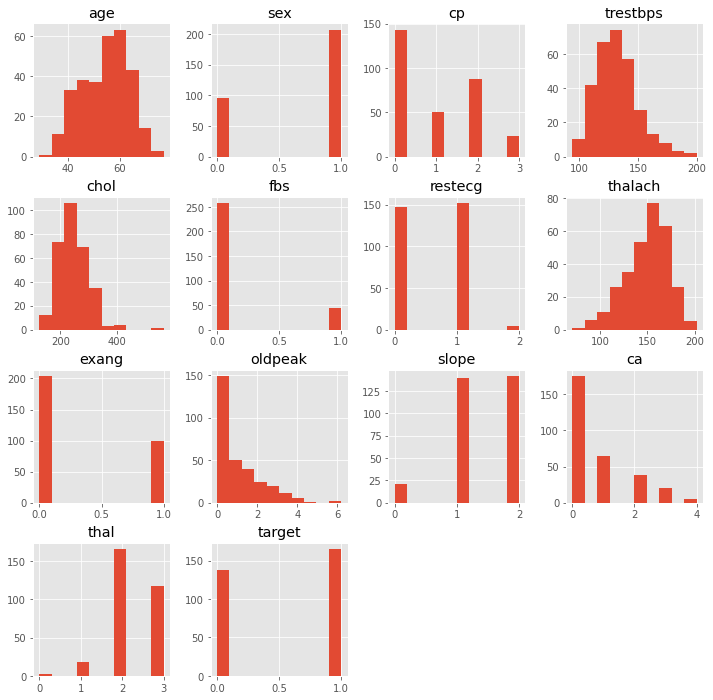

In [29]:
# plot histograms for each variable
heart_df.hist(figsize = (12, 12))
plt.show()

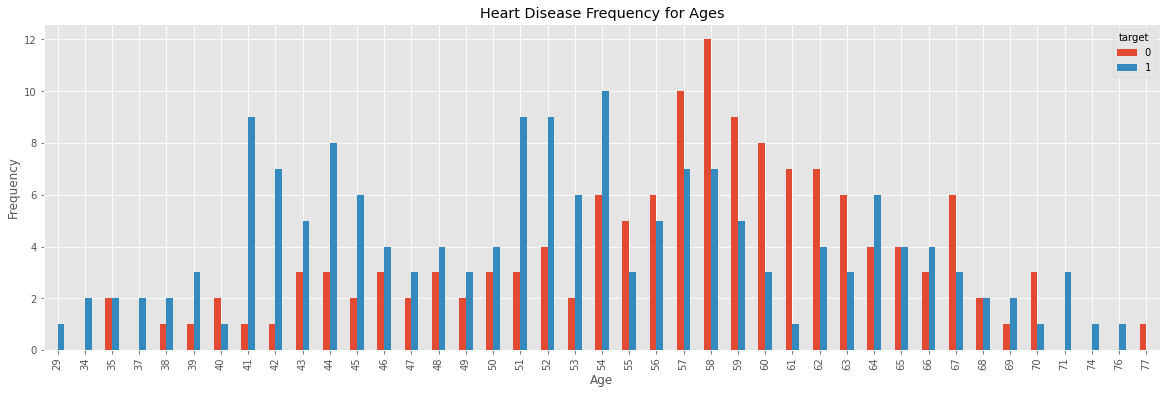

In [30]:
pd.crosstab(heart_df.age,heart_df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


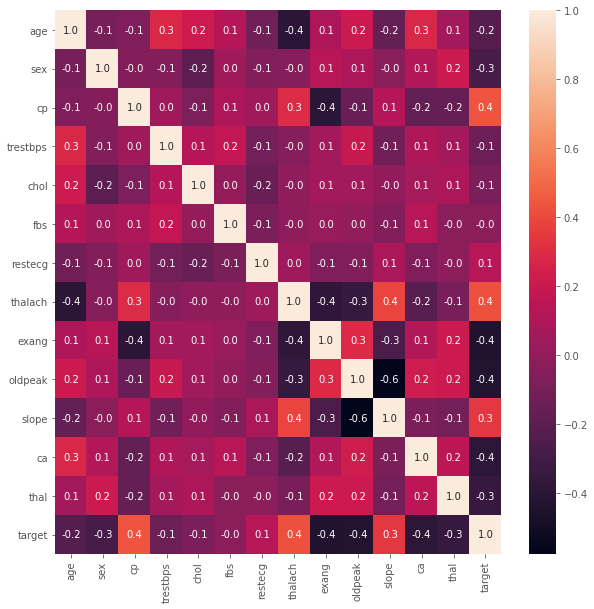

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(),annot=True,fmt='.1f')
plt.show()

In [16]:
heart_df.isnull().any() 


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [38]:
heart_df = heart_df.dropna(axis=0)


In [39]:
# transform data to numeric to enable further analysis
heart_df = heart_df.apply(pd.to_numeric)
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [41]:
heart_df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
X = np.array(heart_df.drop(['target'], 1))
y = np.array(heart_df['target'])

In [45]:
X[0]


array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [46]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [47]:
X[0]


array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [48]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [49]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [50]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6744 - accuracy: 0.5672 - val_loss: 0.6501 - val_accuracy: 0.5410
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6143 - val_loss: 0.6184 - val_accuracy: 0.7049
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5896 - accuracy: 0.7497 - val_loss: 0.5922 - val_accuracy: 0.7869
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7919 - val_loss: 0.5666 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8569 - val_loss: 0.5432 - val_accuracy: 0.7869
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.8427 - val_loss: 0.5219 - val_accuracy: 0.8197
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.8395 - val_loss: 0.5026 - val_accuracy: 0.8033
Epoch 8/50
25/25 [=

In [54]:
from sklearn.metrics import classification_report, accuracy_score
categorical_pred = np.argmax(model.predict(X_test), axis=1)

In [55]:

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8032786885245902
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

